In [1]:
import numpy as np
import keras
! export KERAS_BACKEND=tensorflow
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

def plot_multiclass_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
    y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = np.c_[xx.ravel(), yy.ravel()]
    # CHANGE: model.predict_classes()
    pred_func = model.predict_classes(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)



Using TensorFlow backend.


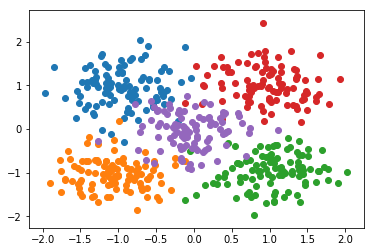

In [2]:

n_pts = 500
centers = [[-1, 1], [-1, -1], [1, -1], [1, 1], [0, 0]]
# NO factor, noise argument | YES cluster_std
X, y = datasets.make_blobs(n_samples = n_pts, random_state = 123, centers = centers, cluster_std = 0.4)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])

In [3]:
y_cat = to_categorical(y,5)
model = Sequential()
# Input = 2 features we have 2D graph before
model.add(Dense(5, input_shape=(2,), activation='softmax'))
model.compile(Adam(lr=0.1), 'categorical_crossentropy', metrics=['accuracy'])
h = model.fit(x = X, y = y_cat, verbose=1, batch_size = 50, epochs=100, shuffle = 'true')


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
500/500 [==============================] - 0s 307us/step - loss: 1.0799 - acc: 0.6540
Epoch 2/100
500/500 [==============================] - 0s 27us/step - loss: 0.5602 - acc: 0.8340
Epoch 3/100
500/500 [==============================] - 0s 48us/step - loss: 0.3809 - acc: 0.9260
Epoch 4/100
500/500 [==============================] - 0s 28us/step - loss: 0.3104 - acc: 0.9440
Epoch 5/100
500/500 [==============================] - 0s 40us/step - loss: 0.2710 - acc: 0.9440
Epoch 6/100
500/500 [==============================] - 0s 35us/step - loss: 0.2488 - acc: 0.9400
Epoch 7/100
500/500 [==============================] - 0s 42us/step - loss: 0.2319 - acc: 0.9440
Epoch 8/100
500/500 [==============================] - 0s 40us/step - loss: 0.2209 - acc: 0.9440
Epoch 9/100
500/500 [==============================] - 0s 32us/step - loss: 0.2134 - acc: 0.9500
Epoch 

500/500 [==============================] - 0s 31us/step - loss: 0.1519 - acc: 0.9520
Epoch 80/100
500/500 [==============================] - 0s 32us/step - loss: 0.1526 - acc: 0.9520
Epoch 81/100
500/500 [==============================] - 0s 27us/step - loss: 0.1519 - acc: 0.9520
Epoch 82/100
500/500 [==============================] - 0s 29us/step - loss: 0.1548 - acc: 0.9500
Epoch 83/100
500/500 [==============================] - 0s 32us/step - loss: 0.1514 - acc: 0.9520
Epoch 84/100
500/500 [==============================] - 0s 31us/step - loss: 0.1527 - acc: 0.9480
Epoch 85/100
500/500 [==============================] - 0s 30us/step - loss: 0.1518 - acc: 0.9500
Epoch 86/100
500/500 [==============================] - 0s 30us/step - loss: 0.1512 - acc: 0.9480
Epoch 87/100
500/500 [==============================] - 0s 35us/step - loss: 0.1528 - acc: 0.9480
Epoch 88/100
500/500 [==============================] - 0s 33us/step - loss: 0.1511 - acc: 0.9520
Epoch 89/100
500/500 [===========

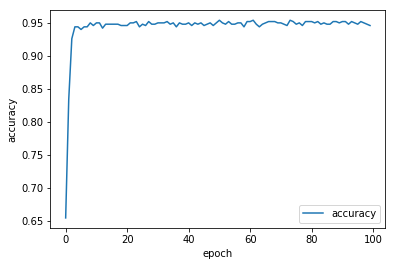

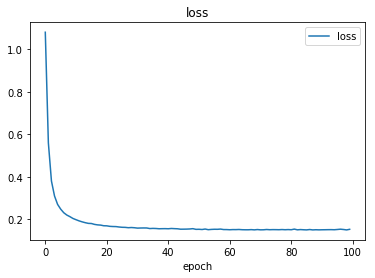

In [4]:
plt.plot(h.history['acc'])
plt.legend(['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

 
plt.plot(h.history['loss'])
plt.legend(['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.show()

Prediction is:  [4]


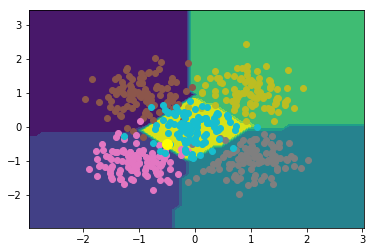

In [5]:

plot_multiclass_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])
plot_multiclass_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])
 
x = -0.5
y = -0.5
 
point = np.array([[x, y]])
prediction = model.predict_classes(point)
plt.plot([x], [y], marker='o', markersize=10, color="yellow")
print("Prediction is: ", prediction)